In [1]:
import pyforest

Look at each model’s uncertainty for the exact same molecule in the test set


1. find all UQ metric values for test set compounds 
2. get all molecules that are used in the test set
3. make comparions across all models in the same test set (separate GP/RF)
4. maybe try comparing same models but different NEKs


The dfs were obtained from the notebook where I got all the compound names and compared their classification type (tn/fp/fn/fp)  

In [7]:
def get_tree_probabilities(model, x_data): 
    test_proba0_df = pd.DataFrame()
    test_proba1_df = pd.DataFrame()
    for tree_num in np.arange(len(model.estimators_)):
        test_proba_temp = model.estimators_[tree_num].predict_proba(x_data)
        test_proba0_df[tree_num] = test_proba_temp[:,0]
        test_proba1_df[tree_num] = test_proba_temp[:,1]
    std0 = test_proba0_df.std(axis=1)
    std1 = test_proba1_df.std(axis=1)
    return std0, std1

# RF model uncertainty: tree probability agreement

In [129]:
df_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/datasets/80train_20test/featurized/'
neks = ['NEK2_binding', 'NEK2_inhibition', 'NEK3_binding', 'NEK5_binding', 'NEK9_binding', 'NEK9_inhibition']
model_types = ['GP', 'RF']
feat_types=['MOE','MFP']
RF_types = ['RF', 'RF_BCW', 'BRFC', 'BRFC_BCW'] 
samplings = ['none_scaled','UNDER','SMOTE']
rf_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/results/RF_results/'
gp_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/results/GP_results/'
cmpd_df_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/results/compound_TNFPFNTP/'
col_order = ['NEK', 'feat_type', 'strategy','modeling_type', 'compound_id', 'active', 'prediction' , 'RF_type']


for nek in neks:
    for feat in feat_types: 
        for samp in samplings: 
            full_df = pd.read_csv(f'{df_path}{nek}_{feat}_{samp}.csv')
            test=full_df[full_df['subset']=='test'] 
            drop_cols=['NEK'	,'compound_id',	'base_rdkit_smiles',	'subset'	,'active']
            x_data=test.drop(columns=drop_cols).to_numpy()
     
            for rf in RF_types:
                with open(f'{rf_path}{nek}_{feat}_{samp}_{rf}_prod.pkl', 'rb') as f: 
                    model = pickle.load(f) 
                std0, std1=get_tree_probabilities(model, x_data)
                print(f'{nek} {feat} {samp} {rf}')
                model_name=rf
                df = pd.read_csv(f'{cmpd_df_path}{nek}_{feat}_{samp}_{model_name}_cmpd_class.csv')
                df['uq_0']=std0 # use if 
                df['uq_1']=std1
                df['UQ_metric_value'] = df.apply(lambda x:x['uq_0'] if x['prediction_type'] in ['TN','FN'] else x['uq_1'], axis=1)
                df['model_version']=f'{samp}_{rf}'
                df.to_csv(f'{cmpd_df_path}{nek}_{feat}_{samp}_{model_name}_cmpd_class.csv', index=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding MOE none_scaled RF


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding MOE none_scaled RF_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding MOE none_scaled BRFC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding MOE none_scaled BRFC_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding MOE UNDER RF


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding MOE UNDER RF_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding MOE UNDER BRFC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding MOE UNDER BRFC_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding MOE SMOTE RF


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding MOE SMOTE RF_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding MOE SMOTE BRFC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding MOE SMOTE BRFC_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding MFP none_scaled RF


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding MFP none_scaled RF_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding MFP none_scaled BRFC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding MFP none_scaled BRFC_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding MFP UNDER RF


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding MFP UNDER RF_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding MFP UNDER BRFC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding MFP UNDER BRFC_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding MFP SMOTE RF


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding MFP SMOTE RF_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding MFP SMOTE BRFC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding MFP SMOTE BRFC_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition MOE none_scaled RF


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition MOE none_scaled RF_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition MOE none_scaled BRFC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition MOE none_scaled BRFC_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition MOE UNDER RF


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition MOE UNDER RF_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition MOE UNDER BRFC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition MOE UNDER BRFC_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition MOE SMOTE RF


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition MOE SMOTE RF_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition MOE SMOTE BRFC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition MOE SMOTE BRFC_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition MFP none_scaled RF


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition MFP none_scaled RF_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition MFP none_scaled BRFC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition MFP none_scaled BRFC_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition MFP UNDER RF


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition MFP UNDER RF_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition MFP UNDER BRFC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition MFP UNDER BRFC_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition MFP SMOTE RF


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition MFP SMOTE RF_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition MFP SMOTE BRFC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition MFP SMOTE BRFC_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding MOE none_scaled RF


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding MOE none_scaled RF_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding MOE none_scaled BRFC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding MOE none_scaled BRFC_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding MOE UNDER RF


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding MOE UNDER RF_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding MOE UNDER BRFC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding MOE UNDER BRFC_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding MOE SMOTE RF


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding MOE SMOTE RF_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding MOE SMOTE BRFC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding MOE SMOTE BRFC_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding MFP none_scaled RF


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding MFP none_scaled RF_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding MFP none_scaled BRFC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding MFP none_scaled BRFC_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding MFP UNDER RF


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding MFP UNDER RF_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding MFP UNDER BRFC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding MFP UNDER BRFC_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding MFP SMOTE RF


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding MFP SMOTE RF_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding MFP SMOTE BRFC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding MFP SMOTE BRFC_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding MOE none_scaled RF


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding MOE none_scaled RF_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding MOE none_scaled BRFC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding MOE none_scaled BRFC_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding MOE UNDER RF


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding MOE UNDER RF_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding MOE UNDER BRFC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding MOE UNDER BRFC_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding MOE SMOTE RF


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding MOE SMOTE RF_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding MOE SMOTE BRFC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding MOE SMOTE BRFC_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding MFP none_scaled RF


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding MFP none_scaled RF_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding MFP none_scaled BRFC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding MFP none_scaled BRFC_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding MFP UNDER RF


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding MFP UNDER RF_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding MFP UNDER BRFC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding MFP UNDER BRFC_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding MFP SMOTE RF


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding MFP SMOTE RF_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding MFP SMOTE BRFC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding MFP SMOTE BRFC_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding MOE none_scaled RF


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding MOE none_scaled RF_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding MOE none_scaled BRFC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding MOE none_scaled BRFC_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding MOE UNDER RF


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding MOE UNDER RF_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding MOE UNDER BRFC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding MOE UNDER BRFC_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding MOE SMOTE RF


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding MOE SMOTE RF_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding MOE SMOTE BRFC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding MOE SMOTE BRFC_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding MFP none_scaled RF


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding MFP none_scaled RF_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding MFP none_scaled BRFC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding MFP none_scaled BRFC_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding MFP UNDER RF


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding MFP UNDER RF_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding MFP UNDER BRFC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding MFP UNDER BRFC_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding MFP SMOTE RF


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding MFP SMOTE RF_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding MFP SMOTE BRFC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding MFP SMOTE BRFC_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition MOE none_scaled RF


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition MOE none_scaled RF_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition MOE none_scaled BRFC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition MOE none_scaled BRFC_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition MOE UNDER RF


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition MOE UNDER RF_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition MOE UNDER BRFC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition MOE UNDER BRFC_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition MOE SMOTE RF


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition MOE SMOTE RF_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition MOE SMOTE BRFC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition MOE SMOTE BRFC_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition MFP none_scaled RF


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition MFP none_scaled RF_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition MFP none_scaled BRFC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition MFP none_scaled BRFC_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition MFP UNDER RF


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition MFP UNDER RF_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition MFP UNDER BRFC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition MFP UNDER BRFC_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition MFP SMOTE RF


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition MFP SMOTE RF_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition MFP SMOTE BRFC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition MFP SMOTE BRFC_BCW


<IPython.core.display.Javascript object>

# GP uncertainty: predictive variance

In [130]:
for nek in neks:
    for feat in feat_types: 
        for samp in samplings: 
            results_df = pd.read_csv(f'{gp_path}{nek}_{feat}_{samp}_matern_prod_test.csv')
            print(f'{nek} {feat} {samp} GP_matern')
            df = pd.read_csv(f'{cmpd_df_path}{nek}_{feat}_{samp}_GP_matern_cmpd_class.csv')
            df['uq_0']=results_df['var_pred_class0']
            df['uq_1']=results_df['var_pred_class1']
            df['UQ_metric_value'] = df.apply(lambda x:x['uq_0'] if x['prediction_type'] in ['TN','FN'] else x['uq_1'], axis=1)
            df['model_version']=f'{samp}_GP_matern'
            
            df=df[col_order]
            df.to_csv(f'{cmpd_df_path}{nek}_{feat}_{samp}_GP_matern_cmpd_class.csv', index=False)


<IPython.core.display.Javascript object>

NEK2_binding MOE none_scaled GP_matern


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding MOE UNDER GP_matern


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding MOE SMOTE GP_matern


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding MFP none_scaled GP_matern


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding MFP UNDER GP_matern


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding MFP SMOTE GP_matern


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition MOE none_scaled GP_matern


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition MOE UNDER GP_matern


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition MOE SMOTE GP_matern


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition MFP none_scaled GP_matern


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition MFP UNDER GP_matern


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition MFP SMOTE GP_matern


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding MOE none_scaled GP_matern


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding MOE UNDER GP_matern


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding MOE SMOTE GP_matern


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding MFP none_scaled GP_matern


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding MFP UNDER GP_matern


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding MFP SMOTE GP_matern


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding MOE none_scaled GP_matern


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding MOE UNDER GP_matern


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding MOE SMOTE GP_matern


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding MFP none_scaled GP_matern


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding MFP UNDER GP_matern


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding MFP SMOTE GP_matern


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding MOE none_scaled GP_matern


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding MOE UNDER GP_matern


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding MOE SMOTE GP_matern


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding MFP none_scaled GP_matern


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding MFP UNDER GP_matern


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding MFP SMOTE GP_matern


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition MOE none_scaled GP_matern


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition MOE UNDER GP_matern


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition MOE SMOTE GP_matern


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition MFP none_scaled GP_matern


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition MFP UNDER GP_matern


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition MFP SMOTE GP_matern


<IPython.core.display.Javascript object>

In [131]:
# make df of all models for 1 nek 
for nek in neks:
    nek_df=[]
    for feat in feat_types: 
        for samp in samplings: 
            for model in ['GP_matern']+ RF_types:
                df = pd.read_csv(f'{cmpd_df_path}{nek}_{feat}_{samp}_{model}_cmpd_class.csv')
                nek_df.append(df)
    full_df=pd.concat(nek_df,axis=0)
    full_df.to_csv(f'{cmpd_df_path}{nek}_all_models.csv', index=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 2. Find all common compounds in test sets for 1 nek at a time

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding


<bound method Series.unique of 283     kdb_2562
284     kdb_2854
285     kdb_2631
286     kdb_2754
287     kdb_3508
          ...   
7636    kdb_2667
7637    kdb_2696
7638    kdb_2840
7639    kdb_2863
7640     kdb_980
Name: compound_id, Length: 3396, dtype: object>

['none_scaled_RF_MOE' 'none_scaled_RF_BCW_MOE' 'none_scaled_BRFC_MOE'
 'none_scaled_BRFC_BCW_MOE' 'UNDER_RF_MOE' 'SMOTE_RF_MOE'
 'none_scaled_RF_MFP' 'none_scaled_RF_BCW_MFP' 'none_scaled_BRFC_MFP'
 'none_scaled_BRFC_BCW_MFP' 'UNDER_RF_MFP' 'SMOTE_RF_MFP']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

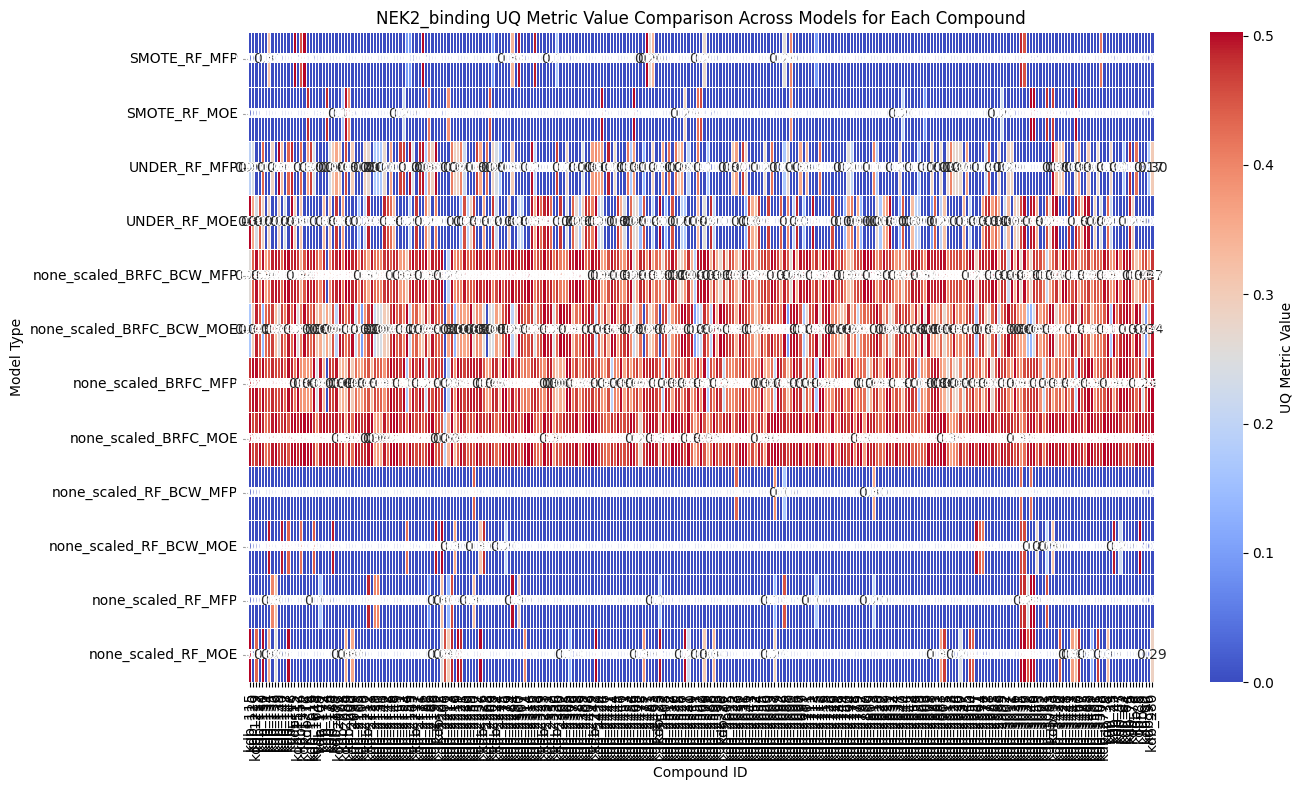

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition


<bound method Series.unique of 407       kdb_819
408       kdb_952
409       kdb_682
410      kdb_1216
411       kdb_481
           ...   
10984     kdb_749
10985     kdb_819
10986     kdb_840
10987     kdb_872
10988     kdb_966
Name: compound_id, Length: 4872, dtype: object>

['none_scaled_RF_MOE' 'none_scaled_RF_BCW_MOE' 'none_scaled_BRFC_MOE'
 'none_scaled_BRFC_BCW_MOE' 'UNDER_RF_MOE' 'SMOTE_RF_MOE'
 'none_scaled_RF_MFP' 'none_scaled_RF_BCW_MFP' 'none_scaled_BRFC_MFP'
 'none_scaled_BRFC_BCW_MFP' 'UNDER_RF_MFP' 'SMOTE_RF_MFP']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

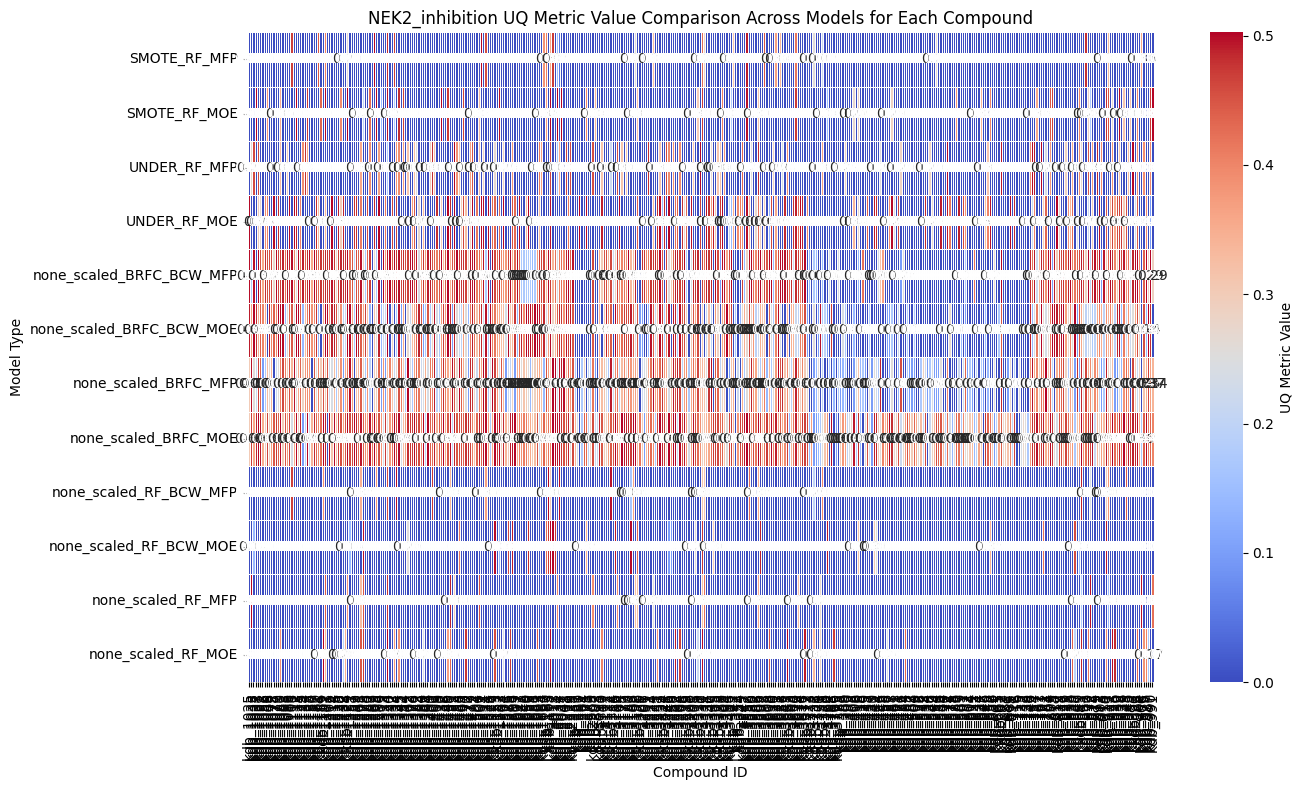

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding


<bound method Series.unique of 282     kdb_2690
283       kdb_98
284     kdb_2082
285     kdb_2350
286     kdb_2655
          ...   
7609    kdb_2632
7610    kdb_2996
7611    kdb_3010
7612    kdb_3023
7613    kdb_3053
Name: compound_id, Length: 3384, dtype: object>

['none_scaled_RF_MOE' 'none_scaled_RF_BCW_MOE' 'none_scaled_BRFC_MOE'
 'none_scaled_BRFC_BCW_MOE' 'UNDER_RF_MOE' 'SMOTE_RF_MOE'
 'none_scaled_RF_MFP' 'none_scaled_RF_BCW_MFP' 'none_scaled_BRFC_MFP'
 'none_scaled_BRFC_BCW_MFP' 'UNDER_RF_MFP' 'SMOTE_RF_MFP']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

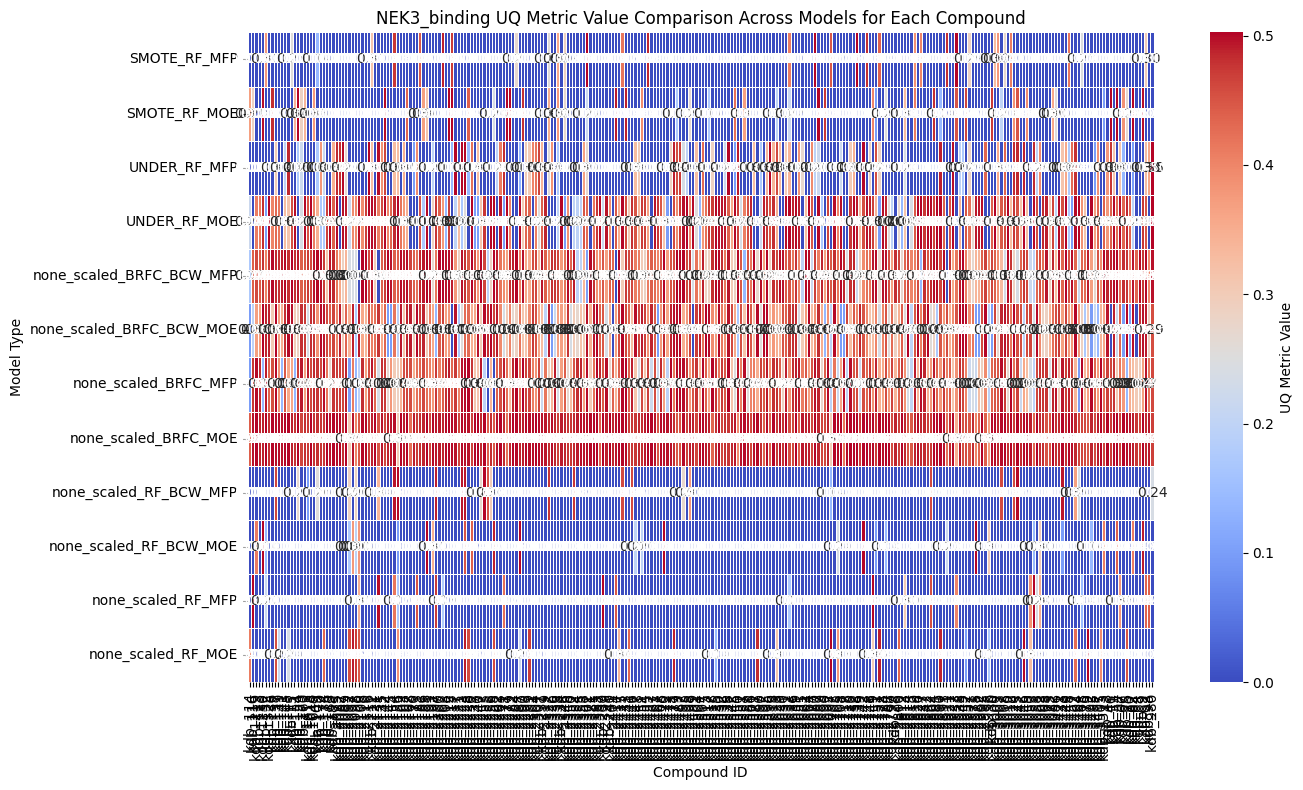

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding


<bound method Series.unique of 248     kdb_2328
249     kdb_3496
250     kdb_1040
251     kdb_2388
252     kdb_2069
          ...   
6691    kdb_2820
6692    kdb_2894
6693    kdb_2934
6694    kdb_3052
6695    kdb_3458
Name: compound_id, Length: 2976, dtype: object>

['none_scaled_RF_MOE' 'none_scaled_RF_BCW_MOE' 'none_scaled_BRFC_MOE'
 'none_scaled_BRFC_BCW_MOE' 'UNDER_RF_MOE' 'SMOTE_RF_MOE'
 'none_scaled_RF_MFP' 'none_scaled_RF_BCW_MFP' 'none_scaled_BRFC_MFP'
 'none_scaled_BRFC_BCW_MFP' 'UNDER_RF_MFP' 'SMOTE_RF_MFP']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

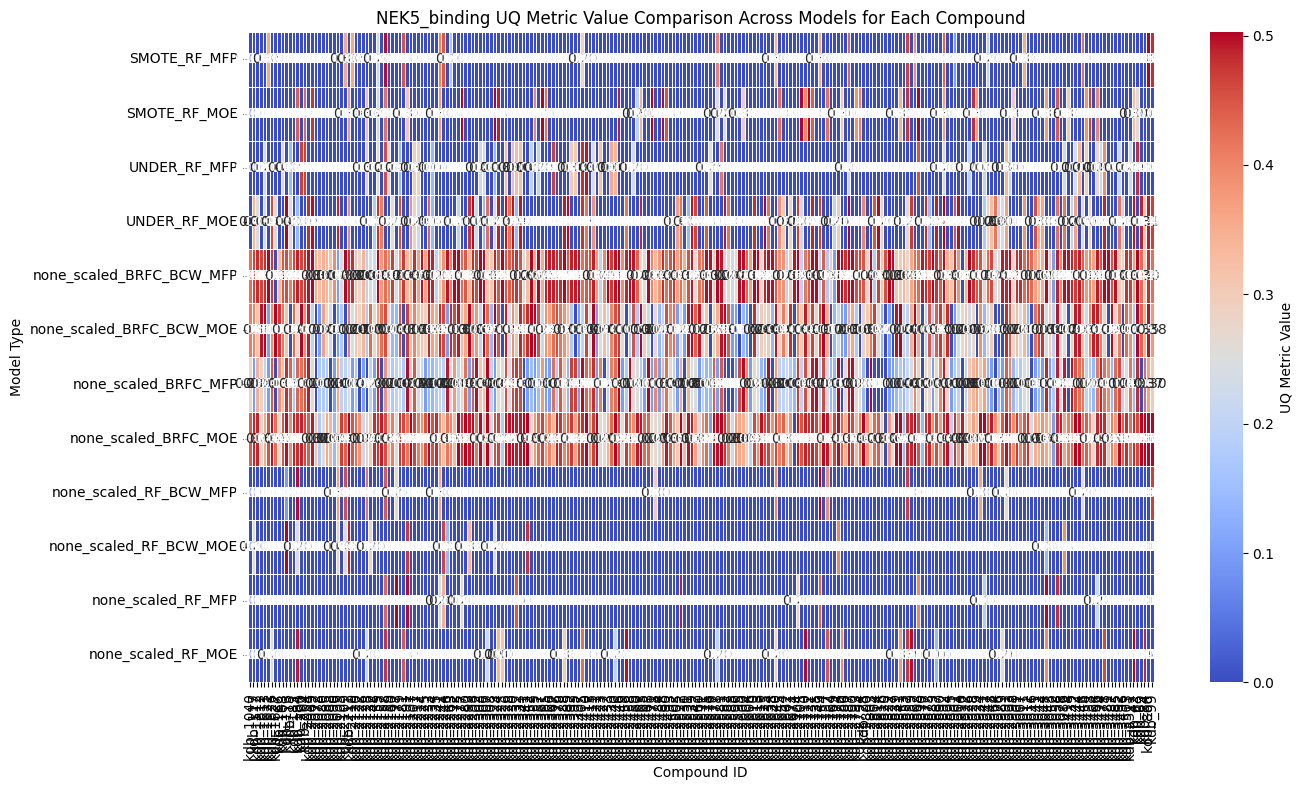

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding


<bound method Series.unique of 283     kdb_2122
284     kdb_1612
285     kdb_2155
286     kdb_2425
287     kdb_2397
          ...   
7636    kdb_2673
7637    kdb_2768
7638    kdb_2845
7639    kdb_3053
7640      kdb_74
Name: compound_id, Length: 3396, dtype: object>

['none_scaled_RF_MOE' 'none_scaled_RF_BCW_MOE' 'none_scaled_BRFC_MOE'
 'none_scaled_BRFC_BCW_MOE' 'UNDER_RF_MOE' 'SMOTE_RF_MOE'
 'none_scaled_RF_MFP' 'none_scaled_RF_BCW_MFP' 'none_scaled_BRFC_MFP'
 'none_scaled_BRFC_BCW_MFP' 'UNDER_RF_MFP' 'SMOTE_RF_MFP']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

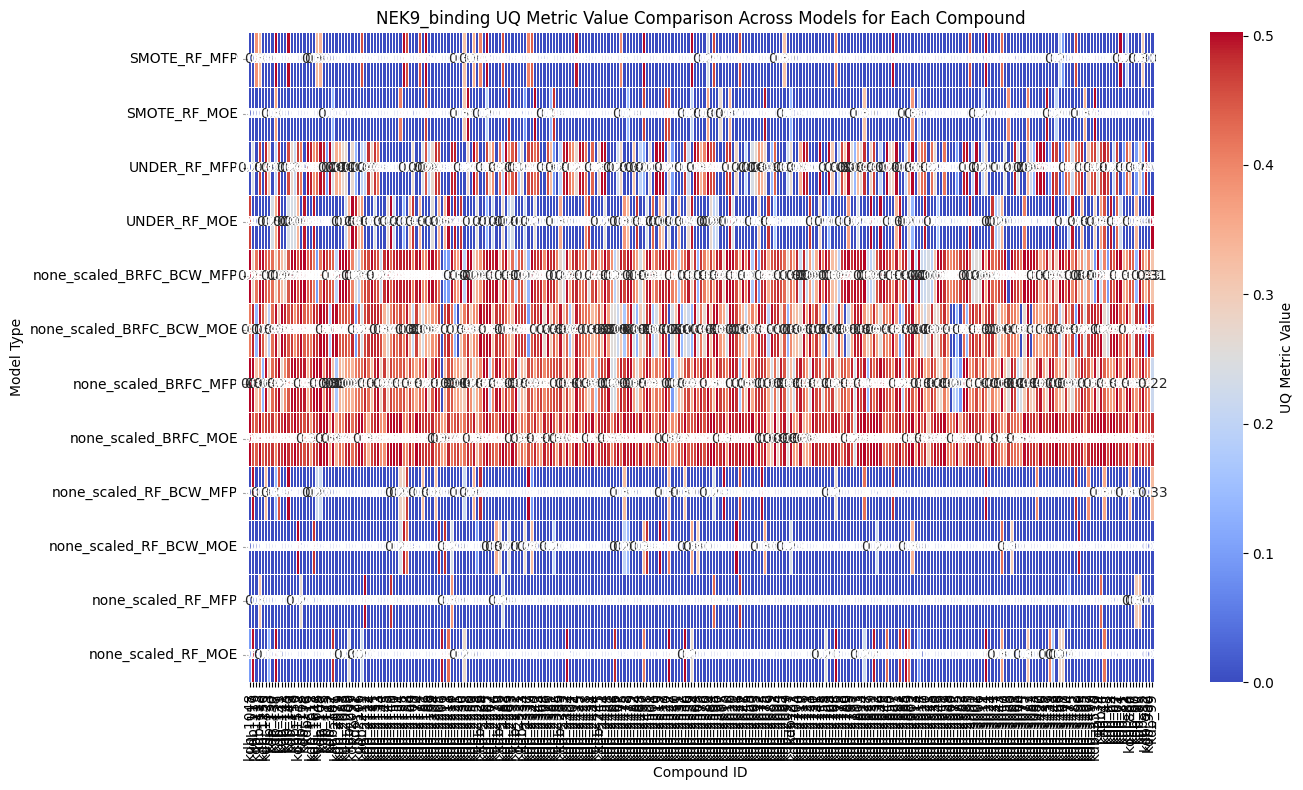

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition


<bound method Series.unique of 80      kdb_3330
81      kdb_3294
82      kdb_3296
83      kdb_3328
84      kdb_3119
          ...   
2155    kdb_3756
2156    kdb_3757
2157    kdb_3761
2158    kdb_3762
2159    kdb_3772
Name: compound_id, Length: 960, dtype: object>

['none_scaled_RF_MOE' 'none_scaled_RF_BCW_MOE' 'none_scaled_BRFC_MOE'
 'none_scaled_BRFC_BCW_MOE' 'UNDER_RF_MOE' 'SMOTE_RF_MOE'
 'none_scaled_RF_MFP' 'none_scaled_RF_BCW_MFP' 'none_scaled_BRFC_MFP'
 'none_scaled_BRFC_BCW_MFP' 'UNDER_RF_MFP' 'SMOTE_RF_MFP']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

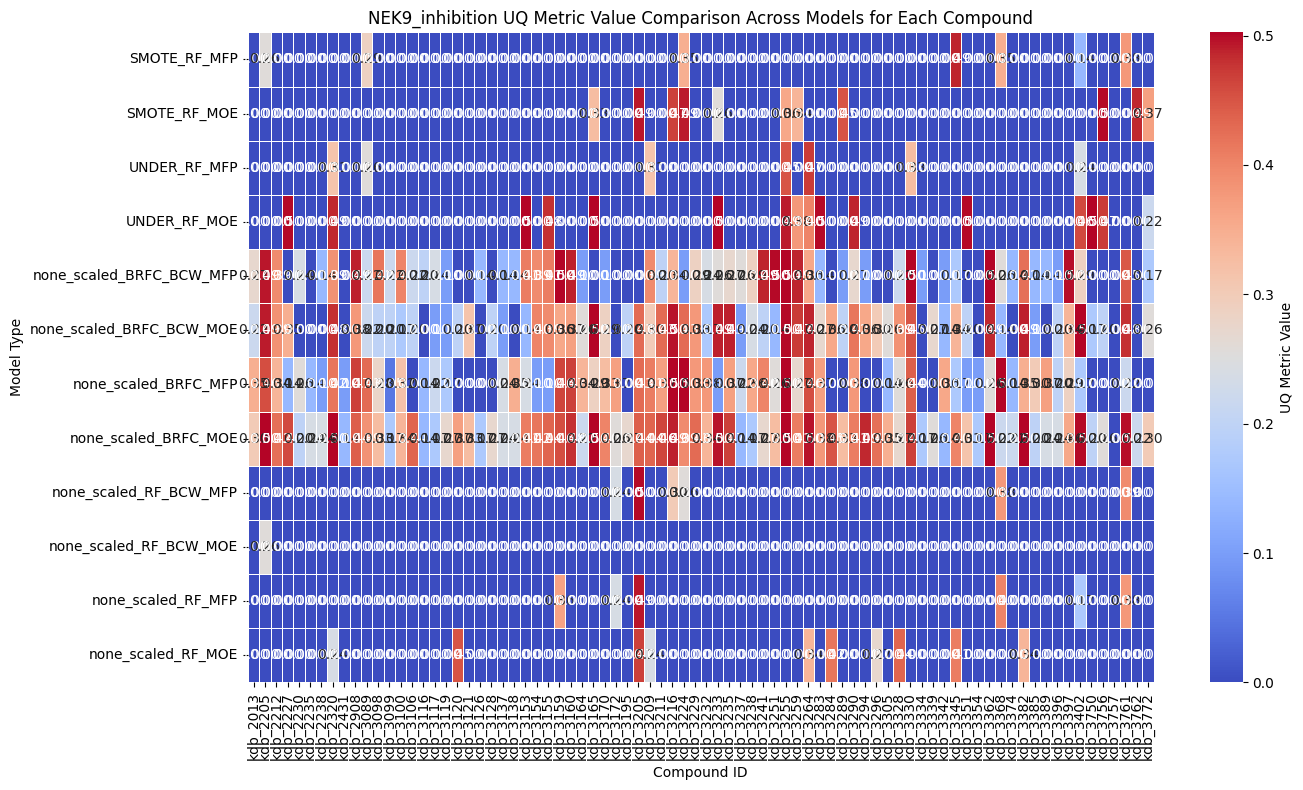

In [148]:
sampling_combos_rf = [('none_scaled','RF'),('none_scaled','RF_BCW'),('SMOTE','RF'), 
    ('none_scaled','BRFC'),('none_scaled','BRFC_BCW'),('UNDER','RF')]
samp_rf_list1 = [f'{samp}_{rf}' for samp, rf in sampling_combos_rf]
sampling_combos = [('none_scaled','RF'),('none_scaled','RF_BCW'),('SMOTE','RF'), 
    ('none_scaled','BRFC'),('none_scaled','BRFC_BCW'),('UNDER','RF'), ('SMOTE', 'GP_matern'),
                  ('none_scaled','GP_matern'), ('UNDER','GP_matern')]
samp_list = [f'{samp}_{m}' for samp,m in sampling_combos]
# rf first
for nek in neks:
    all_model_test_cmpds=[] 
    nek_df = pd.read_csv(f'{cmpd_df_path}{nek}_all_models.csv')
    for feat in feat_types: 
        for samp in samplings: 
            for m in RF_types:
                
                df=pd.read_csv(f'{cmpd_df_path}{nek}_{feat}_{samp}_{m}_cmpd_class.csv')
                cmpd_set = set(df['compound_id'].values)
                all_model_test_cmpds.append(cmpd_set)
    print(nek)
    intersection_set = set.intersection(*all_model_test_cmpds)
    comparison_df = nek_df[nek_df['compound_id'].isin(intersection_set)]
    
    comparison_df = comparison_df[comparison_df['model_version'].isin(samp_list)]
    comparison_df['model name']=comparison_df['model_version'].astype(str)+ '_'+comparison_df['feat_type']
    display(comparison_df['compound_id'].unique)
    print(comparison_df['model name'].unique())
    melted_df = comparison_df.melt(
    id_vars=['compound_id', 'feat_type', 'NEK', 'strategy', 'modeling_type', 'model_version'],  
    value_vars=['UQ_metric_value'], var_name='metric',  value_name='UQ_metric')
    melted_df.to_csv(f'/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/UQ/compare_across/{nek}_RF_models_UQ.csv', index=False)
    common_cmpds = list(intersection_set)
    wide_df = comparison_df.pivot_table(index='model name',columns='compound_id', 
                                        values='UQ_metric_value')        
    # display(wide_df)
    wide_df.to_csv(f'/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/UQ/compare_across/{nek}_RF_models_UQ_wide.csv', index=False)
    plt.figure(figsize=(14, 8))

    sns.heatmap(wide_df, cmap='coolwarm', annot=True, fmt='.2f', 
        cbar_kws={'label': 'UQ Metric Value'}, 
        linewidths=0.5,xticklabels=True,yticklabels=True)
    
    plt.title(f'{nek} UQ Metric Value Comparison Across Models for Each Compound')
    plt.xlabel('Compound ID')
    plt.ylabel('Model Type')
    plt.xticks(rotation=90)  
    plt.tight_layout()
    plt.savefig(f'/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/UQ/compare_across/figs/{nek}.png')
    plt.show()
    